In [1]:
import pandas as pd

In [2]:
# 读取数据
data = pd.read_excel("./引下线.xlsx",header=None,skiprows=1)

In [3]:
data.shape

(100000, 12)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,大连地区,32.94,64.05,0.15,461.95,294.22,67.95,199.22,0.0,22.12,116.89,E
1,大连地区,22.32,45.35,0.09,410.70,283.53,66.65,151.33,0.0,11.10,21.89,C
2,大连地区,34.11,70.81,0.13,452.81,293.55,68.42,194.73,0.0,23.81,86.11,E
3,大连地区,30.31,69.94,0.15,450.31,294.60,68.31,193.15,0.0,21.80,48.36,E
4,大连地区,12.95,12.36,0.04,320.80,271.85,64.34,119.39,0.0,2.46,2.52,A


In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.579207,34.283242,0.041847,545.547095,285.827918,63.898058,168.822658,11.280837,15.064276,126.213140
std,22.649233,20.601057,0.058397,98.531688,11.855188,18.502231,33.465007,13.354233,8.665014,204.918406
min,4.680000,3.000000,0.000000,311.230000,256.150000,26.000000,110.000000,0.000000,0.000000,0.000000
25%,14.070000,15.127500,0.000000,476.670000,276.490000,49.630000,139.647500,0.000000,7.600000,8.510000
50%,28.990000,32.950000,0.000000,556.760000,287.110000,65.970000,170.060000,2.500000,15.115000,31.320000
75%,47.270000,50.652500,0.090000,626.512500,295.590000,77.240000,199.570000,22.580000,22.570000,148.152500
max,103.160000,87.500000,0.190000,709.990000,307.150000,95.000000,220.000000,40.000000,30.000000,859.990000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  object 
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  object 
dtypes: float64(10), object(2)
memory usage: 9.2+ MB


通过对数据的初步观察发现，  
1、数据共含有11个特征，其中有一个特征为离散型特征，其余为连续型特征。最后一列为标签，共有六个类别。需要将第一列的字符型特征进行one-hot编码,便于模型的输入。  
2、数据中未存在缺失值的情况，因此不需要进行缺失值的处理。  

In [7]:
# 选取特征和标签
labels = data.iloc[:,-1]
data = data.iloc[:,:-1]

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,大连地区,32.94,64.05,0.15,461.95,294.22,67.95,199.22,0.0,22.12,116.89
1,大连地区,22.32,45.35,0.09,410.70,283.53,66.65,151.33,0.0,11.10,21.89
2,大连地区,34.11,70.81,0.13,452.81,293.55,68.42,194.73,0.0,23.81,86.11
3,大连地区,30.31,69.94,0.15,450.31,294.60,68.31,193.15,0.0,21.80,48.36
4,大连地区,12.95,12.36,0.04,320.80,271.85,64.34,119.39,0.0,2.46,2.52


In [9]:
labels.value_counts()

C    16809
E    16741
F    16683
A    16677
D    16626
B    16464
Name: 11, dtype: int64

对标签值观察后得出  
共分为六类，分别为：A B C D E F  
每一类的类别数量相对平衡  
为了不破坏数据的平衡性，采用对每类样本随机抽样的方法进行实验，随机抽取每类样本的80%作为训练集，20%作为测试集。  
在训练之前首先需要对标签值进行 onehot 编码，将标签值转换为向量形式，便于模型的训练。


In [10]:
# 对第一列进行one-hot编码 后拼接
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
region = one_hot_encoder.fit_transform(data.iloc[:,0].values.reshape(-1,1))


In [11]:
region.shape

(100000, 5)

In [12]:
# '临汾地区'[1,0,0,0,0], 
# '大连地区'[0,1,0,0,0],
# '平朔地区'[0,0,1,0,0],
# '广州地区'[0,0,0,1,0],
# '长治地区'[0,0,0,0,1]

In [13]:
# 完成和其他数据的拼接
data = pd.concat([pd.DataFrame(region),data.iloc[:,1:]],axis=1,ignore_index=True)

In [14]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,32.94,64.05,0.15,461.95,294.22,67.95,199.22,0.0,22.12,116.89
1,0.0,1.0,0.0,0.0,0.0,22.32,45.35,0.09,410.70,283.53,66.65,151.33,0.0,11.10,21.89
2,0.0,1.0,0.0,0.0,0.0,34.11,70.81,0.13,452.81,293.55,68.42,194.73,0.0,23.81,86.11
3,0.0,1.0,0.0,0.0,0.0,30.31,69.94,0.15,450.31,294.60,68.31,193.15,0.0,21.80,48.36
4,0.0,1.0,0.0,0.0,0.0,12.95,12.36,0.04,320.80,271.85,64.34,119.39,0.0,2.46,2.52


In [15]:
# 划分数据集 将前80%作为训练集，后20%作为测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80000, 15) (20000, 15) (80000,) (20000,)


In [17]:
# 对标签进行one-hot编码
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train.values.reshape(-1,1))
y_test = one_hot_encoder.fit_transform(y_test.values.reshape(-1,1))


In [18]:
# 'A': [1,0,0,0,0,0]
# 'B': [0,1,0,0,0,0]
# 'C': [0,0,1,0,0,0]
# 'D': [0,0,0,1,0,0]
# 'E': [0,0,0,0,1,0]
# 'F': [0,0,0,0,0,1]

In [19]:
class_name = one_hot_encoder.categories_
class_name

[array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)]

In [20]:
class_name = ['A', 'B', 'C', 'D', 'E', 'F']

In [21]:
# 使用 XGBoost 进行模型的训练
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)


In [22]:
model.fit(X_train,y_train,verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [24]:
class_name

['A', 'B', 'C', 'D', 'E', 'F']

测试报告：
              precision    recall  f1-score   support

           A  1.00000000 1.00000000 1.00000000      3398
           B  1.00000000 1.00000000 1.00000000      3254
           C  1.00000000 1.00000000 1.00000000      3361
           D  1.00000000 1.00000000 1.00000000      3332
           E  1.00000000 1.00000000 1.00000000      3352
           F  1.00000000 1.00000000 1.00000000      3303

   micro avg  1.00000000 1.00000000 1.00000000     20000
   macro avg  1.00000000 1.00000000 1.00000000     20000
weighted avg  1.00000000 1.00000000 1.00000000     20000
 samples avg  1.00000000 1.00000000 1.00000000     20000

混淆矩阵：


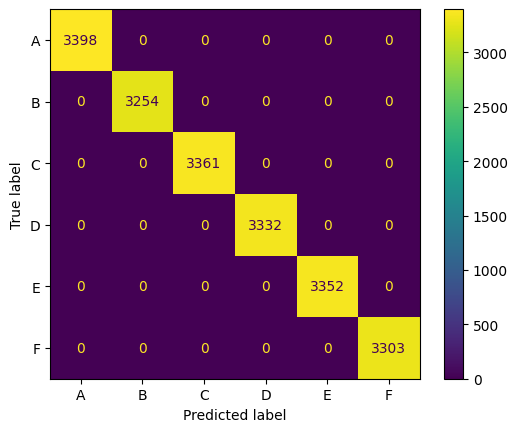

各个类别的误报率 :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [25]:
y_pred = model.predict(X_test)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score

report = classification_report(y_test, y_pred,target_names=[c for c in class_name],digits=8)
print("测试报告：")
print(report)

print("混淆矩阵：")
cm = confusion_matrix(y_true=y_test.argmax(axis = 1), y_pred=y_pred.argmax(axis = 1), labels=[i for i in range(len(class_name))])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[c for c in class_name])
disp.plot()
plt.show()

def false_positive_rate(y_real,y_pred):
    cm = confusion_matrix(y_true=y_real.argmax(axis = 1), y_pred=y_pred.argmax(axis = 1))
    fpr = []
    for class_index in range(cm.shape[0]):
        fp = sum(cm[:, class_index]) - cm[class_index, class_index]
        tn = np.sum(cm) - np.sum(cm[class_index, :]) - np.sum(cm[:, class_index]) + cm[class_index, class_index]
        fpr.append(fp / (fp + tn))
    return fpr
fpr = false_positive_rate(y_pred,y_test)
print("各个类别的误报率 : ",fpr)

In [27]:
# 保存模型
import pickle
pickle.dump(model,open("./checkpoints/model.pkl","wb"))

In [220]:
# 测试
test = np.array([0,1,0,0,0,32.94,64.05,0.15,461.95,294.22,67.95,199.22,0.0,22.12,116.89])

In [221]:
pred  = model.predict(test.reshape(1,-1))

In [222]:
pred = one_hot_encoder.inverse_transform(pred)

In [223]:
pred.item()

'E'

In [134]:
pred.argmax(axis = 1)

array([4], dtype=int64)

In [2]:
# 加载保存的模型
import numpy as np
import pickle
model = pickle.load(open("./checkpoints/model.pkl","rb"))
test = np.array([0,1,0,0,0,32.94,64.05,0.15,461.95,294.22,67.95,199.22,0.0,22.12,116.89])
pred  = model.predict(test.reshape(1,-1))

In [3]:
pred

array([[0., 0., 0., 0., 1., 0.]])

In [30]:
one_hot_encoder.inverse_transform(pred)

array([['E']], dtype=object)